### Dependencies

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

pd.set_option('display.max_columns', 25)

%matplotlib inline

### The Data

* Private: A factor with levels No and Yes indicating private or public university
* Apps: Number of applications received
* Accept: Number of applications accepted
* Enroll: Number of new students enrolled
* Top10perc: Pct. new students from top 10% of H.S. class
* Top25perc: Pct. new students from top 25% of H.S. class
* F.Undergrad: Number of fulltime undergraduates
* P.Undergrad: Number of parttime undergraduates
* Outstate: Out-of-state tuition
* Room.Board: Room and board costs
* Books: Estimated book costs
* Personal: Estimated personal spending
* PhD: Pct. of faculty with Ph.D.’s
* Terminal: Pct. of faculty with terminal degree
* S.F.Ratio: Student/faculty ratio
* perc.alumni: Pct. alumni who donate
* Expend: Instructional expenditure per student
* Grad.Rate: Graduation rate

### Load data 

In [2]:
admissions = pd.read_csv("College_Data")
print(f"Dimensions of Data: {admissions.shape[0]} rows by {admissions.shape[1]} columns")
admissions.head()

Dimensions of Data: 777 rows by 19 columns


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Rename and edit various columns

In [3]:
admissions.rename(columns={"Unnamed: 0": "School", "F.Undergrad": "F_Undergrad",
                           "P.Undergrad": "P_Undergrad", "Room.Board": "Room_Board",
                           "S.F.Ratio": "S_F_Ratio", "perc.alumni": "perc_alumni",
                           "Grad.Rate": "Grad_Rate"}, inplace=True)
admissions.head()

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
print(f"Number of unique elements per feature:")
print("_____________________________________")
admissions.nunique(dropna=False)

Number of unique elements per feature:
_____________________________________


School         777
Private          2
Apps           711
Accept         693
Enroll         581
Top10perc       82
Top25perc       89
F_Undergrad    714
P_Undergrad    566
Outstate       640
Room_Board     553
Books          122
Personal       294
PhD             78
Terminal        65
S_F_Ratio      173
perc_alumni     61
Expend         744
Grad_Rate       81
dtype: int64

In [5]:
admissions.profile_report()

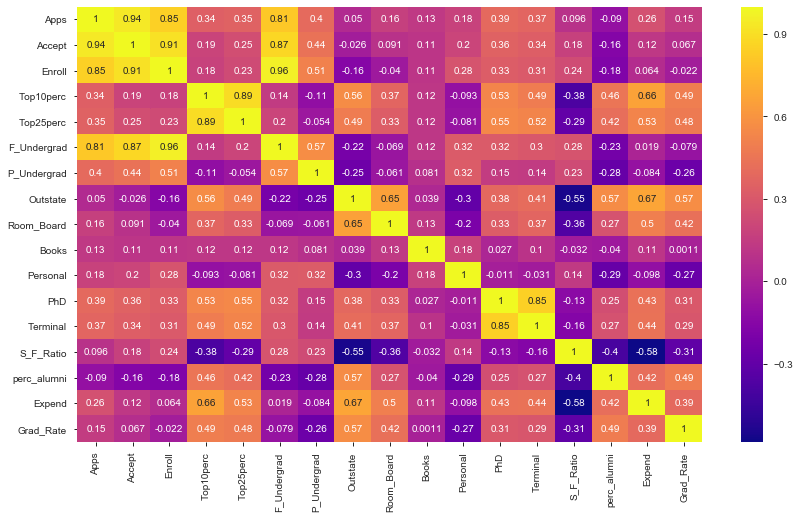

In [6]:
fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(admissions.corr(), annot=True, cmap="plasma", ax=ax);

### Feature engineer three columns

In [7]:
admissions["Perc_Accepted"] = round(admissions["Accept"] / admissions["Apps"], 3) * 100
admissions["Perc_Enrolled"] = round(admissions["Enroll"] / admissions["Accept"], 3) * 100
admissions["Est_Total_Cost"] = admissions[["Outstate", "Room_Board", "Books", "Personal"]].sum(axis=1)

In [8]:
admissions.describe()[["Perc_Accepted", "Perc_Enrolled", "Est_Total_Cost"]]

,Perc_Accepted,Perc_Enrolled,Est_Total_Cost
count,777.000000,777.000000,777.000000
mean,74.690862,41.202188,16688.218790
std,14.707961,13.399449,4675.340968
min,15.400000,10.000000,6604.000000
25%,67.600000,31.700000,13279.000000
50%,77.900000,38.700000,16079.000000
75%,84.900000,48.600000,19650.000000
max,100.000000,100.000000,29095.000000


### Plot basic information

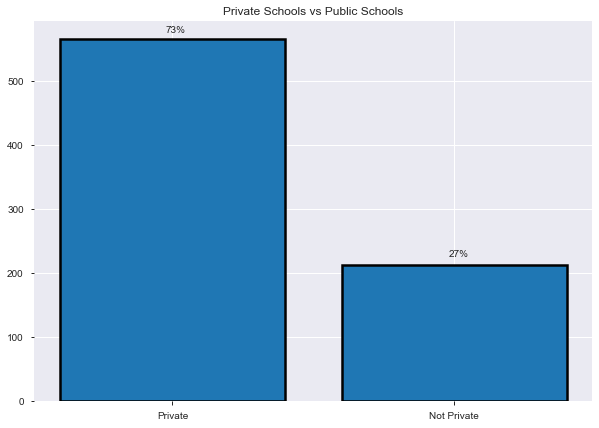

In [9]:
xVar = ["Private", "Not Private"]
yVar = admissions["Private"].value_counts().values

fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x=xVar, height=yVar, edgecolor="black", linewidth=2.5)
ax.annotate(s="73%", xy=(-0.025,575))
ax.annotate(s="27%", xy=(0.98, 225))
ax.set_title("Private Schools vs Public Schools");

### 20 Schools with the Lowest Acceptance Rate

In [10]:
admissions[admissions["Perc_Accepted"].between(15, 40.5)]

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Perc_Accepted,Perc_Enrolled,Est_Total_Cost
16,Amherst College,Yes,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100,23.1,42.1,27318
60,Bowdoin College,Yes,3356,1019,418,76,100,1490,8,19030,5885,1495,875,93,96,11.2,52,20447,96,30.4,41.0,27285
70,Brown University,Yes,12586,3239,1462,87,95,5643,349,19528,5926,720,1100,99,100,7.6,39,20440,97,25.7,45.1,27274
144,Columbia University,Yes,6756,1930,871,78,96,3376,55,18624,6664,550,300,97,98,5.9,21,30639,99,28.6,45.1,26138
158,Dartmouth College,Yes,8587,2273,1087,87,99,3918,32,19545,6070,550,1100,95,99,4.7,49,29619,98,26.5,47.8,27265
159,Davidson College,Yes,2373,956,452,77,96,1601,6,17295,5070,600,1011,95,97,12.0,46,17581,94,40.3,47.3,23976
174,Duke University,Yes,13789,3893,1583,90,98,6188,53,18590,5950,625,1162,95,96,5.0,44,27206,97,28.2,40.7,26327
221,Georgetown University,Yes,11115,2881,1390,71,93,5881,406,18300,7131,670,1700,91,92,7.2,27,19635,95,25.9,48.2,27801
250,Harvard University,Yes,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100,15.6,74.2,27315
264,Huron University,Yes,600,197,124,3,9,392,69,7260,3090,600,1840,31,35,12.9,4,9249,21,32.8,62.9,12790


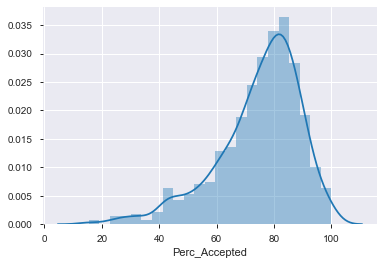

In [11]:
sns.distplot(admissions["Perc_Accepted"]);

### Summary of Duke: Part 1

In [12]:
duke = admissions[admissions["School"] == "Duke University"]

In [13]:
outstate = int(round(duke["Outstate"] / duke["Est_Total_Cost"], 2) * 100)
room = int(round(duke["Room_Board"] / duke["Est_Total_Cost"], 2) * 100)
books = int(round(duke["Books"] / duke["Est_Total_Cost"], 2) * 100)
personal = int(round(duke["Personal"] / duke["Est_Total_Cost"], 2) * 100)

values = [outstate, room, books, personal]

In [16]:
yLabels = ["0", "$2,500", "$5,000", "$7,500", "$10,000", "$12,500", "$15,000", "$17,500"]
names = ["Tuition", "Room", "Personal", "Books"]

### Static Dashboard Experiment

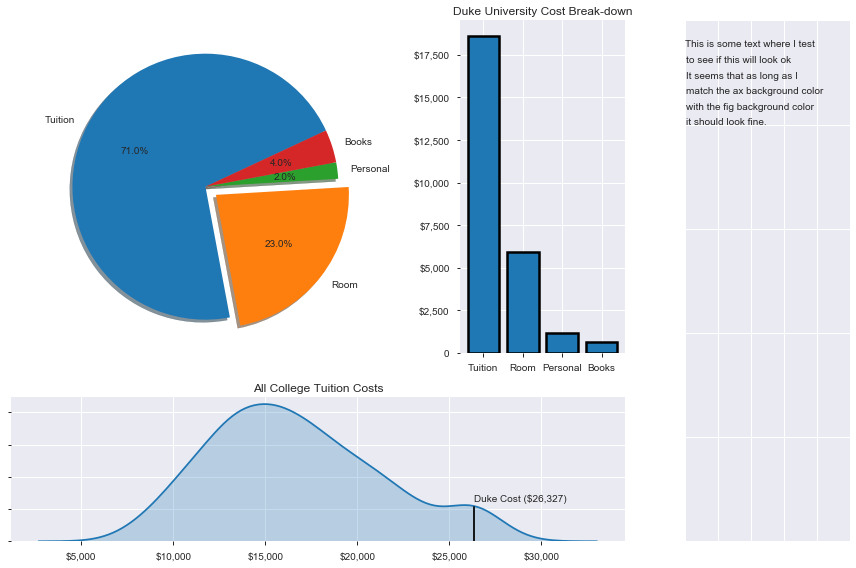

In [17]:
fig = plt.figure(figsize=(12,8))
fig.set_facecolor("white")

ax1 = plt.subplot2grid((3,4), (0,0), colspan=2, rowspan=2)
ax1.pie(x=values, labels=names, shadow=True, explode=(0,0.1,0,0),
       startangle=25, autopct="%1.1f%%")

ax2 = plt.subplot2grid((3,4), (0,2), rowspan=2)
ax2.bar(x=names, height=[18590, 5950, 1162, 625], edgecolor="black",
          linewidth=2.5)
ax2.set_yticklabels(yLabels)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_title("Duke University Cost Break-down")

ax3 = plt.subplot2grid((3,4), (2,0), colspan=3)
sns.kdeplot(admissions["Est_Total_Cost"], ax=ax3, legend=False, shade=True)
ax3.axvline(x=duke["Est_Total_Cost"].values, color="black", ymin=0, ymax=0.24)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.annotate(s="Duke Cost ($26,327)", xy=[duke["Est_Total_Cost"].values, 0.000025])
ax3.set_xticklabels(["0","$5,000", "$10,000", "$15,000", "$20,000", "$25,000", "$30,000"])
ax3.set_yticklabels([""])
ax3.set_title("All College Tuition Costs")

ax4 = plt.subplot2grid((3,4), (0,3), rowspan=3)
ax4.tick_params(bottom=False, left=False)
ax4.set_xticklabels("")
ax4.set_yticklabels("")
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
ax4.spines["bottom"].set_visible(False)
ax4.spines["left"].set_visible(False)
ax4.annotate(s="This is some text where I test", xy=[0,0.95])
ax4.annotate(s="to see if this will look ok", xy=[0.01,0.92])
ax4.annotate(s="It seems that as long as I", xy=[0.01, 0.89])
ax4.annotate(s="match the ax background color", xy=[0.01, 0.86])
ax4.annotate(s="with the fig background color", xy=[0.01, 0.83])
ax4.annotate(s="it should look fine.", xy=[0.01, 0.8])

fig.tight_layout()

In [18]:
# Fix background of subplots to match main background 